# SPECT Heart Data

SPECT = Single Proton Emission Computed Tomography (a type of "cat" scan)

This notebook is an example of constructing a decision tree model.  The data are binary features indicating whether a SPECT image of a patient's heart contains features that might indicate a normal or abnormal diagnosis.

The dataset is from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/SPECT+Heart) and was downloaded December 28, 2016.

In [1]:
# %config IPCompleter.greedy=True
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from IPython.display import Image

## Define Functions

In [2]:
# From Arron Hall (stackoverflow)

def merge_two_dicts(x, y):
    """Given two dicts, merge them into a new dict as a shallow copy."""
    z = x.copy()
    z.update(y)
    return z

## Load the data

There is a training data file and a testing data file.  Also add some columns to define the classes.

In [3]:
cols = ['Diagnosis']
for n in range(1,23):
    cols.append(('F%s' %n))

train = pd.read_csv('data\SPECT.train', names=cols)
train.head()

,Diagnosis,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
0,1,0,0,0,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,1
2,1,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,1,0,0,0,0,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0


In [4]:
# Add some helpful columns
train['patient'] = range(1, len(train)+1)
train['class'] = 'blank'

# Assign names to 'class' based on diagnosis
train.loc[np.array(train['Diagnosis'] == 1), ('class')] = 'normal'
train.loc[np.array(train['Diagnosis'] == 0), ('class')] = 'abnormal'

train.head()

,Diagnosis,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F15,F16,F17,F18,F19,F20,F21,F22,patient,class
0,1,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,normal
1,1,0,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,2,normal
2,1,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,3,normal
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,4,normal
4,1,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,5,normal


In [5]:
test = pd.read_csv('data\SPECT.test', names=cols)
test.head()

,Diagnosis,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
0,1,1,0,0,1,1,0,0,0,1,...,0,1,1,1,0,0,1,1,0,0
1,1,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
3,1,0,1,1,1,0,0,1,0,1,...,1,1,0,1,0,0,0,0,1,0
4,1,0,0,1,0,0,0,0,1,0,...,1,1,0,1,0,0,0,0,0,1


In [6]:
# Add some helpful columns
test['patient'] = range(1, len(test)+1)
test['class'] = 'blank'

# Assign names to 'class' based on diagnosis
test.loc[np.array(test['Diagnosis'] == 1), ('class')] = 'normal'
test.loc[np.array(test['Diagnosis'] == 0), ('class')] = 'abnormal'

test.head()

,Diagnosis,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F15,F16,F17,F18,F19,F20,F21,F22,patient,class
0,1,1,0,0,1,1,0,0,0,1,...,1,1,0,0,1,1,0,0,1,normal
1,1,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2,normal
2,1,0,0,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,1,3,normal
3,1,0,1,1,1,0,0,1,0,1,...,0,1,0,0,0,0,1,0,4,normal
4,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,5,normal


## Examine the data

Rather than jumping straight into modeling, I'll examine the data to better understand it and to look for obvious ways of classifying patients prior to modeling.

In [10]:
# Look for missing data points
np.where(pd.isnull(train))

(array([], dtype=int64), array([], dtype=int64))

In [12]:
# Look for missing data points
np.where(pd.isnull(test))

(array([], dtype=int64), array([], dtype=int64))

In [13]:
# Find indices of normal and abnormal diagnosis for use below
train_ind_normal = train.index[train['Diagnosis'] == 1]
train_ind_abnormal = train.index[train['Diagnosis'] == 0]

Check to see if some patients can be classified based on the total number of features in the SPECT images.  The hypothesis is that too many or too few features may indicate a diagnosis.

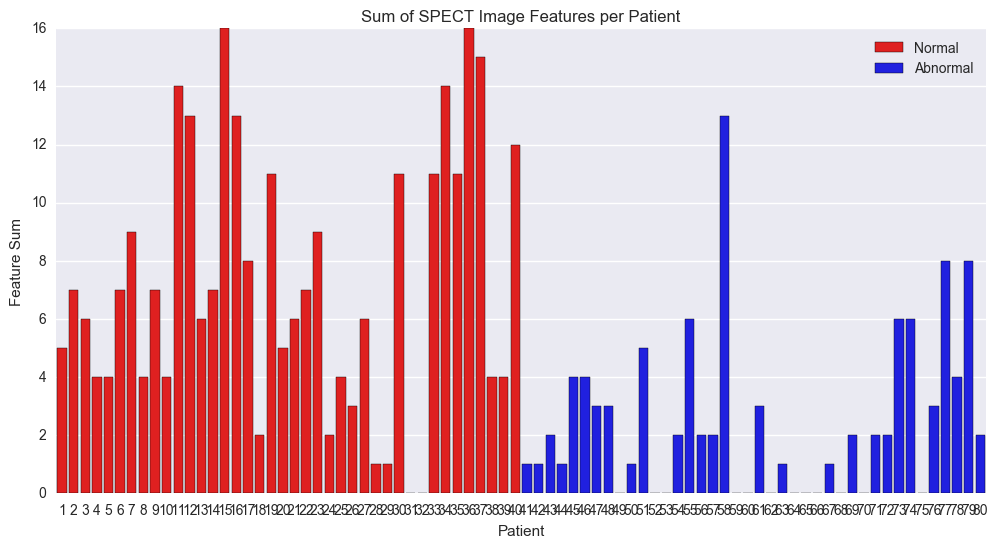

In [14]:
# Bar plot
# Sum the columns for each patient
train['sum_across_cols'] = 0
train['sum_across_cols'] = train[cols[1:23]].sum(axis=1)

# Gather the normal and abnormal values for plotting
train['normal'] = train['sum_across_cols'][train_ind_normal]
train['abnormal'] = train['sum_across_cols'][train_ind_abnormal]

# Plot the sums
fig = plt.figure(figsize=(12,6))
ax1 = plt.gca()
sb.barplot(ax=ax1, x=train['patient'], y=train['normal'], 
           color='r', label='Normal')
sb.barplot(ax=ax1, x=train['patient'], y=train['abnormal'], 
           color='b', label='Abnormal')
plt.title('Sum of SPECT Image Features per Patient')
plt.ylabel('Feature Sum')
plt.xlabel('Patient')
plt.legend();

The only patients with a total number of features greater than 13 are those in the 'normal' class.  It's possible that this can be used to classify some patients, but without more knowledge of the meaning of each feature, this is a risky approach

The range of total features for each patient does not show a helpful pattern.  Perhaps the total number of patients with any given feature will highlight a feature that is especially useful.

In [15]:
# Compare attributes of normal and abnormal diagnoses

# Sum the number patients with positive results in each column
train_sum_patient_cols_norm = train.iloc[
    train_ind_normal, 1:23].sum(axis=0, numeric_only=True)
train_sum_patient_cols_abnorm = train.iloc[
    train_ind_abnormal, 1:23].sum(axis=0, numeric_only=True)
sum_each_cols_difference = train_sum_patient_cols_norm - train_sum_patient_cols_abnorm

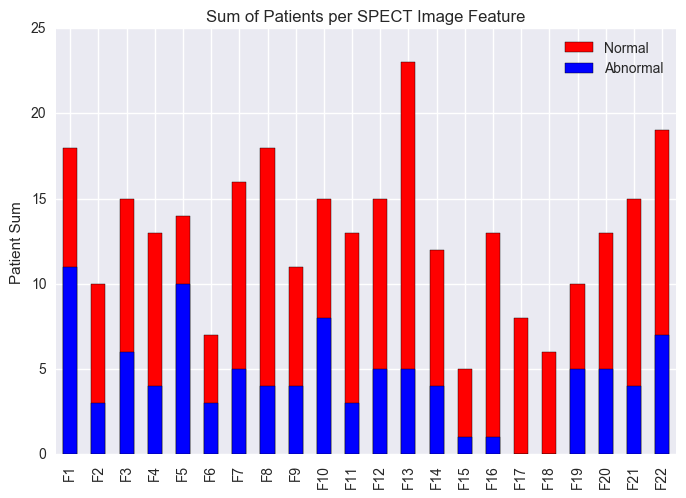

In [16]:
# Examine the number of patients with each feature
train_sum_patient_cols_norm.plot(kind='bar', color='r', label='Normal')
train_sum_patient_cols_abnorm.plot(kind='bar', color='b', label='Abnormal')
plt.title('Sum of Patients per SPECT Image Feature')
plt.ylabel('Patient Sum')
plt.legend();

It might be helpful to see that 'normal' patients always have certain features and never have other features, but there is not an obvious pattern.  F17 and F18 correspond with low numbers of patients, so the uncertainty is likely to be high if we try to trust those features to determine the class of the patient.  It would be nice to have much larger dataset to make a confident judgement.

Perhaps looking at a plot of patients vs features would be helpful in finding patterns.  I'll plot the data 
array itself.

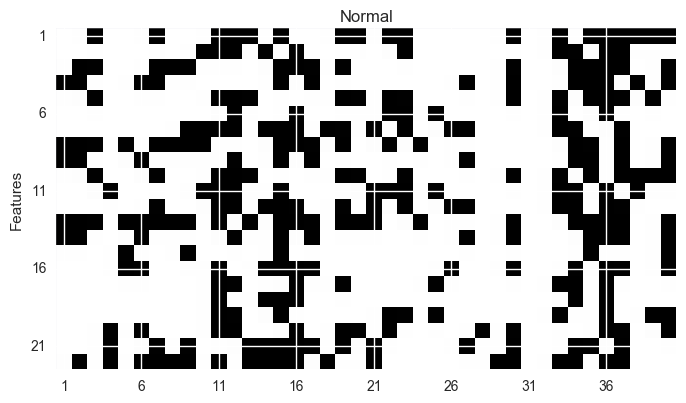

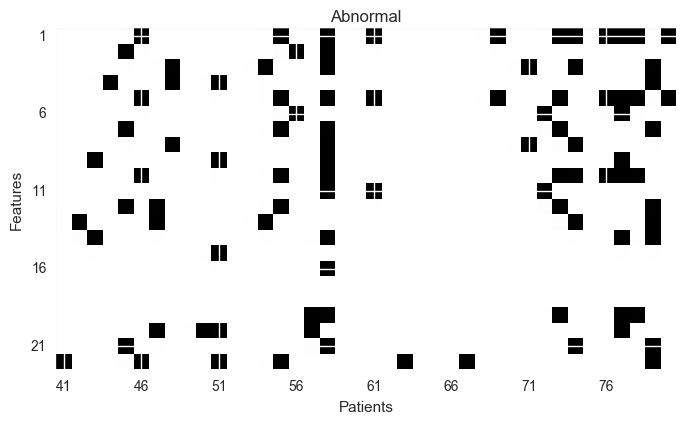

In [17]:
# plot the data on a grid

# Convert to array
train_array = np.array(train[cols[1:23]]).transpose()


# Plot the data
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Features')
ax1.set_title('Normal')
plt.imshow(train_array[:, train_ind_normal], interpolation='None', axes=ax1)
ax1.set_xticklabels([int(x+1) for x in ax1.get_xticks().tolist()]);
ax1.set_yticklabels([int(x+1) for x in ax1.get_yticks().tolist()]);

fig2, ax2 = plt.subplots()
ax2.set_xlabel('Patients')
ax2.set_ylabel('Features')
ax2.set_title('Abnormal')
plt.imshow(train_array[:, train_ind_abnormal], interpolation='None', axes=ax2)
ax2.set_xticklabels([int(x+41) for x in ax2.get_xticks().tolist()]);
ax2.set_yticklabels([int(x+1) for x in ax2.get_yticks().tolist()]);

The black cells show which features are associated with each patient.  However, there is no pattern that seems to be useful for diagnosing patients as a first cut in predicting the diagnosis, so it may be best to go ahead and apply a model.

# Decision Tree Model

In [18]:
# Define parts of the data that will be used in the model
# The dataset includes a training set and a testing set.
train_all = train[cols[1:23]].values
train_all_labels = train['class'].values

test_all = test[cols[1:23]].values
test_all_labels = test['class'].values

The training data will be split into subsets in order to exclude some data for the purpose of testing the trained model.  I could use the whole training dataset and test the model on the original test dataset, but my goal is to hold the original test dataset for the final prediction.  This way, I have the challenge of using a smaller dataset to produce a good model.  Also, the test dataset is not necessarily representative of the full range of data; only a small proportion of the data are classified as abnormal.  Another reason to split the training dataset is that the authors of the dataset apparently achieved 84% accuracy by training with only the training dataset, so I'd like to see how my model compares.

In [19]:
# Split the training data into subsets of training and testing
(train_split_in, test_split_in, train_split_labels, test_split_labels) = train_test_split(
train_all, train_all_labels, train_size=0.50)

In [20]:
# Make a classifier
# To reproduce results, set the random seed
dt_classifier = DecisionTreeClassifier()

print(dt_classifier)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


The decision tree parmeters can be chosen manually, and several models can be made to see which parameters work well.  Although some manual fitting is useful, I'll implement an automated approach to more quickly find parameters that tend to yield good models.  Having already run this a few times, I've narrowed the range of parameters and bracketed the values that tend to work best for this data.

In [21]:
# Automate the optimization

# Establish some params for GridSearchCV
# The notes are intended to reduce overfitting, but are specific to any data, so might
# not apply in all cases.
parameter_grid = {'criterion': ['gini','entropy'], # ['gini','entropy']
                  'max_depth': [3,4,5,6,7,8],      # Usually keep this big
                  'max_features': [2,3,4,5,6,7,8], # Smaller should be better
                  'max_leaf_nodes':[6,7,8,9,10],   # Usually >5 or 10% of min split
                  'min_samples_split':[10,15,20]   # No splitting below this value.  Avoid small numbers, esp if many features
                  }

# Use cross validation to split the data multiple ways without sacraficing much integrity.
# The number of folds, k (n_splits), defines the number of subsets for testing and training.
# 10 folds is typical, but the dataset is small, so a smaller number of folds should be beneficial.
cross_validation = StratifiedKFold(n_splits=6)


# Create the estimator and run several searches to check for the best parameters
estimator = GridSearchCV(dt_classifier, param_grid=parameter_grid, cv=cross_validation)

est_res = []

for n in range(30):    
    # Perform a grid search
    estimator.fit(train_split_in, train_split_labels)
    
    # Save the results in a list for conversion to df below
    est_res.append(merge_two_dicts({
                'mean_score': float(np.mean(estimator.cv_results_['mean_test_score'])),
                'best_score': float(estimator.best_score_)}, 
                                   estimator.best_params_))

# Convert dict to dataframe
gs_df = pd.DataFrame(est_res)


# Make numerical labels for criterion
gs_df['criterion_num'] = 0
ind_list = gs_df[gs_df['criterion'] == 'gini'].index.tolist()

for ind in ind_list:
    gs_df.set_value(index=ind, col='criterion_num', value=1)


# Show some results in a table
gs_df.head(30)

,best_score,criterion,max_depth,max_features,max_leaf_nodes,mean_score,min_samples_split,criterion_num
0,0.825,entropy,5,5,8,0.658175,20,0
1,0.825,entropy,8,3,10,0.658075,20,0
2,0.825,gini,8,7,10,0.657361,20,1
3,0.800,gini,3,3,8,0.656091,20,1
4,0.850,gini,5,7,10,0.660794,20,1
5,0.825,gini,3,7,7,0.656052,10,1
6,0.850,entropy,5,6,9,0.657877,20,0
7,0.800,gini,5,3,9,0.658611,15,1
8,0.825,gini,3,8,10,0.657540,20,1
9,0.825,gini,5,3,8,0.658056,20,1


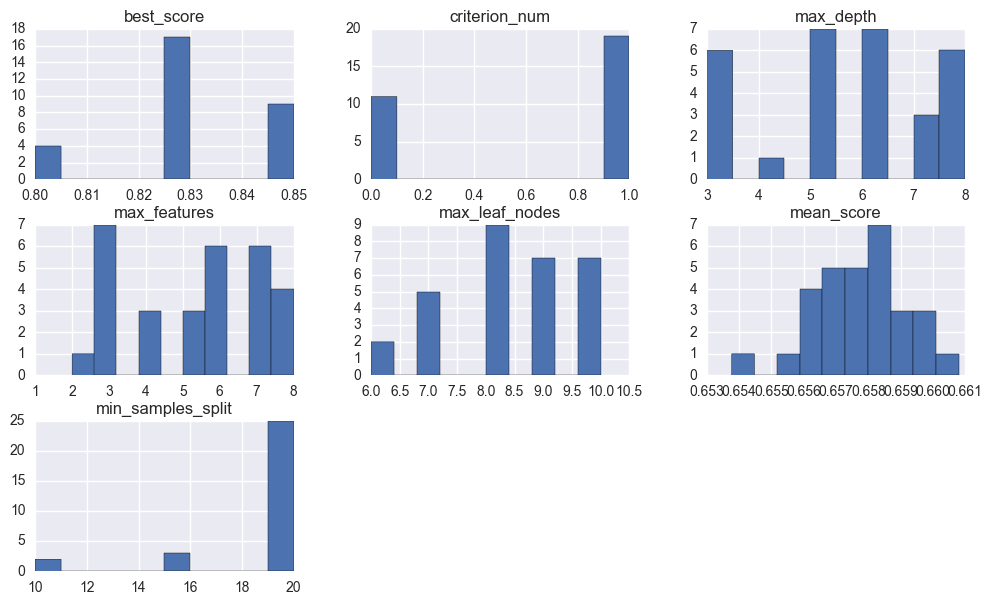

In [22]:
# Show the results in histograms
gs_df.hist(figsize=(12,7));

The largest proportion of the models have a mean score of about 0.66 and the best scores are mostly about 0.825.

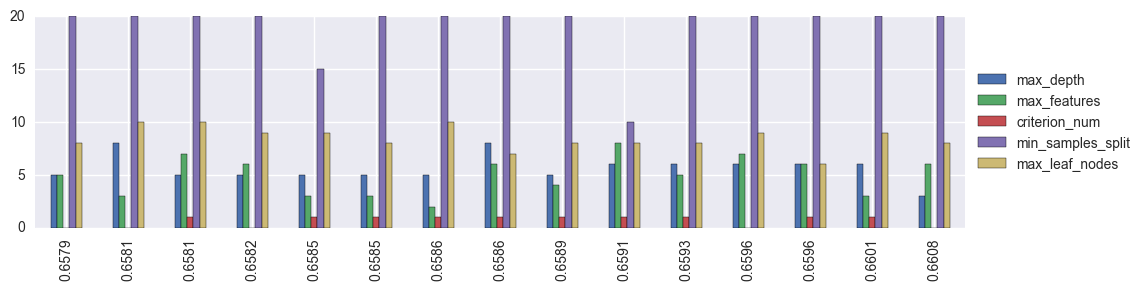

In [23]:
# Examine the models with high scores (>= median)

# Get indices of models with scores at least as high as the median
gs_df_median = gs_df['mean_score'].median()
ind_gs_df_median = gs_df[gs_df['mean_score'] >= gs_df_median].index.tolist()


# Get the axis values for plotting
x_data = (gs_df['mean_score'].ix[ind_gs_df_median]).sort_values()


# Plot the results
fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot(211)
gs_df[['max_depth', 'max_features', 'criterion_num', 'min_samples_split', 'max_leaf_nodes']].ix[ind_gs_df_median].plot(
    ax=ax1, kind='bar')
ax1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
ax1.set_xticklabels([str('%0.4f' %x) for x in x_data]);

The highest scoring models have some parameters that appear to be consistent, like gini (criterion_num = 1), but others are difficult to estimate graphically, but we can find the modes to determine them.

In [24]:
# Get modes of model parameters from the high scoring models
gs_df_modes = gs_df.ix[ind_gs_df_median].mode()
gs_df_modes

# Note: if result table contains more than one row, there is more than one mode for that param

,best_score,criterion,max_depth,max_features,max_leaf_nodes,mean_score,min_samples_split,criterion_num
0,0.825,gini,5.0,3,8.0,0.659563,20.0,1.0
1,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN


Although these results are the products of multple mixed models, on average these parameters produce better fits.  I can build the final optimized model using these, but because of the stochastic nature of each model fit, keep in mind that the values can vary.

C:\Anaconda3\envs\py34\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


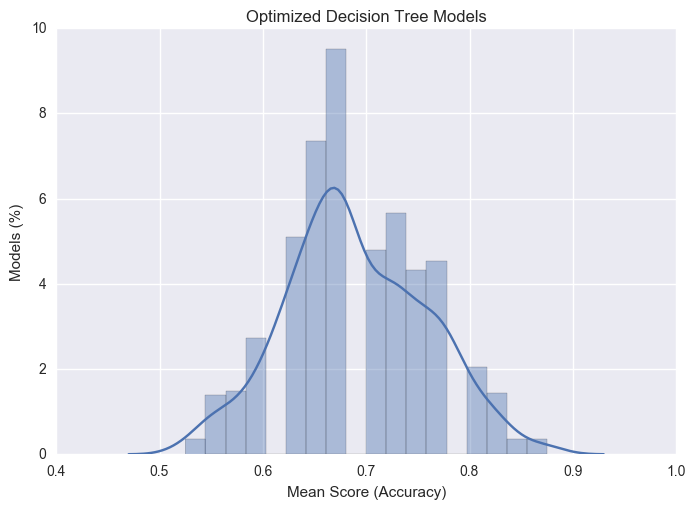

In [33]:
# Show the distribution of mean scores generated by the model 

# Set the parameters of the classifier
dt_classifier.set_params(
    criterion='gini',
    max_depth=5,
    max_features=3,
    max_leaf_nodes=8,
    min_samples_split=20
    )

# Loop through some fits to generate a distribution
dt_scores = []
for n in range(1000):    
    dt_classifier.fit(train_split_in, train_split_labels) # Training data

    dt_scores.append(dt_classifier.score(test_split_in, test_split_labels)) # Testing data

ax1 = sb.distplot(dt_scores)
ax1.set_xlabel('Mean Score (Accuracy)')
ax1.set_ylabel('Models (%)')
ax1.set_title('Optimized Decision Tree Models');

Most of the fits from this model produce a mean accuracy score of about 0.67.  It looks unlikely that my model will beat the 84% mark!

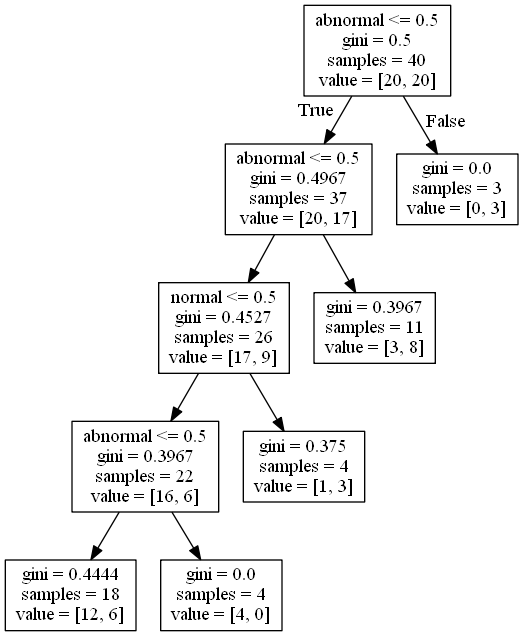

In [34]:
# Display a graphic of the tree

# Write a dot file containing the tree info
export_graphviz(dt_classifier, out_file='dt_tree.dot', feature_names=test_split_labels)

# Use dot code to make the image
!dot -Tpng dt_tree.dot -o dt_tree.png

# Display the image
Image(filename='dt_tree.png')

This diagram illustrates the structure of the tree.  The gini impurity values are relatively low, indicating tendency for equality in the leaf nodes, which is good - we want only one class in each leaf.  However, it would be nice to see lower values.

## Prediction of test data using split-data model

The model above is trained on splits of the training dataset.  Let's try to predict the classes in the test dataset, test_all, which is unused up to this point.

In [35]:
# Get the predictions and the probabilities
test_prediction = dt_classifier.predict(test_all)
test_prediction_prob = dt_classifier.predict_proba(test_all)

# Calculate some values for comparing the prediction with the actual diagnoses
normal = test['Diagnosis'].sum()
abnormal = len(test['Diagnosis']) - normal

pred_normal = np.sum(test_prediction == 'normal')
pred_abnormal = np.sum(test_prediction == 'abnormal')

In [38]:
test.head()

,Diagnosis,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F15,F16,F17,F18,F19,F20,F21,F22,patient,class
0,1,1,0,0,1,1,0,0,0,1,...,1,1,0,0,1,1,0,0,1,normal
1,1,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2,normal
2,1,0,0,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,1,3,normal
3,1,0,1,1,1,0,0,1,0,1,...,0,1,0,0,0,0,1,0,4,normal
4,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,5,normal


In [42]:
# Examine the prediction

print('Doctor diagnosis')
print('Normal: ', normal)
print('Abnormal: ', abnormal)

print()
print('Predicted diagnosis')
print('Normal: ', pred_normal)
print('Abnormal: ', pred_abnormal)
print()
percent_success = 100 - (100 * (normal - pred_normal) / normal)
print('Successful predictions: %0.1f %%' %percent_success)
print()

# Show the successes and failures
test['prediction'] = test_prediction
test['prediction_prob'] = test_prediction_prob[:,1]

test['prediction_num'] = np.nan
test['prediction_result'] = np.nan

# Assign values or names
test.loc[np.array(test['prediction'] == 'normal'), ('prediction_num')] = 1
test.loc[np.array(test['prediction'] == 'abnormal'), ('prediction_num')] = 0

for n in range(len(test)):
    if test.loc[n, ('Diagnosis')] == test.loc[n, 'prediction_num']:
        test.loc[n, ('prediction_result')] = 'Success!'
    else:
        test.loc[n, ('prediction_result')] = 'Failure!'

test.tail(20)

Doctor diagnosis
Normal:  172
Abnormal:  15

Predicted diagnosis
Normal:  122
Abnormal:  65

Successful predictions: 70.9 %



,Diagnosis,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,patient,class,prediction,prediction_prob,prediction_num,prediction_result
167,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,168,normal,normal,0.727273,1.0,Success!
168,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,169,normal,abnormal,0.333333,0.0,Failure!
169,1,1,1,1,0,1,1,0,0,0,...,0,1,0,0,170,normal,abnormal,0.000000,0.0,Failure!
170,1,1,0,1,1,1,0,0,1,1,...,1,1,0,0,171,normal,normal,1.000000,1.0,Success!
171,1,1,0,0,0,1,0,0,0,1,...,0,1,1,0,172,normal,abnormal,0.333333,0.0,Failure!
172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,173,abnormal,abnormal,0.333333,0.0,Success!
173,0,0,0,1,1,0,0,0,1,1,...,0,0,1,0,174,abnormal,normal,0.750000,1.0,Failure!
174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,175,abnormal,abnormal,0.333333,0.0,Success!
175,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,176,abnormal,normal,0.727273,1.0,Failure!
176,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,177,abnormal,abnormal,0.333333,0.0,Success!


C:\Anaconda3\envs\py34\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


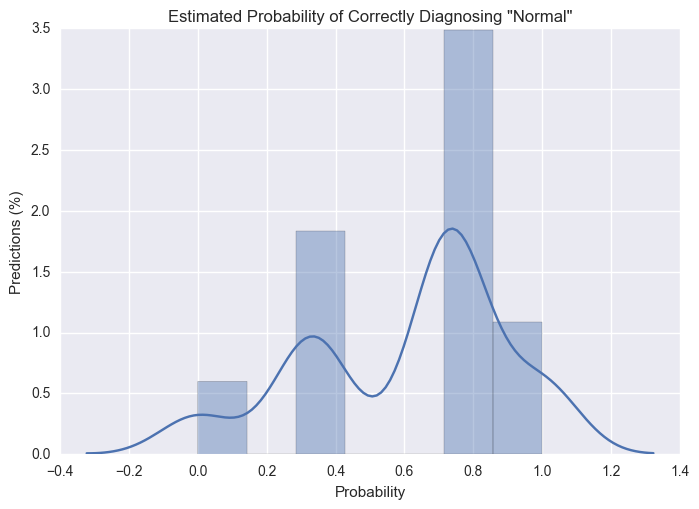

In [43]:
# Plot the probability of predicting the 'normal' class
# The columns give the probabilities of choosing one class or the other.
ax1 = sb.distplot(test_prediction_prob[:,1]);
ax1.set_xlabel('Probability')
ax1.set_ylabel('Predictions (%)')
ax1.set_title('Estimated Probability of Correctly Diagnosing "Normal"');

Although a decision tree is best applied to much larger datasets, it worked well enough here to predict about 71% of the doctor's diagnosis from the SPECT image features.  This is significantly lower than the 84% prediction rate mentioned by the authors of the dataset.  With work on this model, a better estimate might be achieved, but more data or a differnet kind of model may be a better plan.